# Maxcut Brute Force Approach

Ask yourself this: When we "cut" the graph what do we wind up with?

Well, out of n nodes, we have two groups of nodes:
  * Group A: The group of nodes inside the cut
  * Group B: The group of nodes outside the cut

That means for every cut, really what we're doing is just splitting the graph into 2 groups (subsets). In order to brute force this, we must evaluate every possible "cut." In other words, we must evaluate a combinations of subsets we can split the graph into. Basically, it's an enumeration problem.

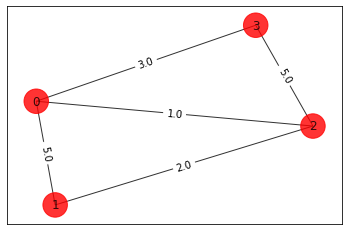

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# First we'll generate a basic 4 node graph.
n=4
G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist=[(0,1,5.0),(0,2,1.0),(0,3,3.0),(1,2,2.0),(2,3,5.0)]
G.add_weighted_edges_from(elist)
colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    """ Draws the graph """
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

draw_graph(G, colors, pos)

In [2]:
# This will be easier using a weight matrix
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)

[[0. 5. 1. 3.]
 [5. 0. 2. 0.]
 [1. 2. 0. 5.]
 [3. 0. 5. 0.]]


case = [0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0] cost = 9.0
case = [0, 1, 0, 0] cost = 7.0
case = [1, 1, 0, 0] cost = 6.0
case = [0, 0, 1, 0] cost = 8.0
case = [1, 0, 1, 0] cost = 15.0
case = [0, 1, 1, 0] cost = 11.0
case = [1, 1, 1, 0] cost = 8.0
case = [0, 0, 0, 1] cost = 8.0
case = [1, 0, 0, 1] cost = 11.0
case = [0, 1, 0, 1] cost = 15.0
case = [1, 1, 0, 1] cost = 8.0
case = [0, 0, 1, 1] cost = 6.0
case = [1, 0, 1, 1] cost = 7.0
case = [0, 1, 1, 1] cost = 9.0
case = [1, 1, 1, 1] cost = 0.0

Best solution = [1, 0, 1, 0] cost = 15.0


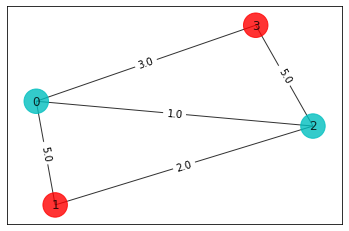

In [3]:
# Now we brute force it
best_cost_brute = 0

# For all enumerations...
for b in range(2**n):
    
    # Generate the current enumeration
    # based off the binary representation of b.
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    
    # Calculate the cost of this enumeration
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
            
    # Keep track of current max cut
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))